In [4]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

In [9]:
def gen_sig(signal_length=100, gaussian_level=51):
    sig = np.zeros(signal_length)
    peaks = np.random.randint(0, signal_length, 1)
    sig[peaks] = 1
    window = signal.gaussian(gaussian_level, std=4)
    for i in range(peaks[0] - (gaussian_level // 2), peaks[0] + (gaussian_level // 2)+1):
        if i >= 0 and i < signal_length:
            sig[i] = window[i - (peaks[0] - (gaussian_level // 2))]
    return sig, peaks

In [10]:
def gen_distance_peak_data(num_data=1000, channel=2, signal_length=100):
    X = np.zeros((num_data, channel, signal_length))
    Y = np.zeros((num_data, ))
    for i in range(num_data):
        peaks = []
        for j in range(channel):
            sig, peak = gen_sig()
            X[i,j] = sig
            peaks.append(peak)
        Y[i] = peaks[1] - peaks[0]
    return X, Y

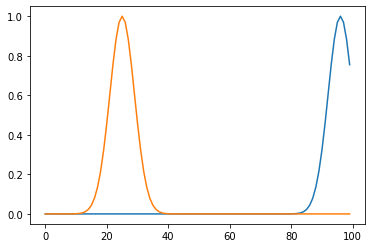

(1000, 2, 100)
-71.0


In [11]:
X, Y = gen_distance_peak_data()
x = np.arange(100)
plt.plot(x, X[0,0])
plt.plot(x, X[0,1])
plt.show()
print(X.shape)
print(Y[0])

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


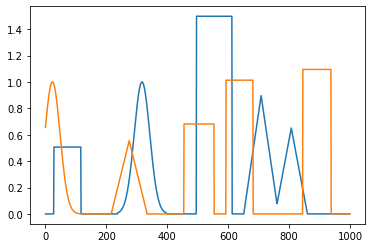

(1, 2, 1000)
[318.  24.]


In [3]:
%load_ext autoreload
%autoreload 2
import sys
import numpy as np
import matplotlib.pyplot as plt
sys.path.append("..")
from data import gen_data

padding_length = 0
G = gen_data.DataGenerator(1, 2, 1000,padding_length=padding_length)
G.addPeakShape(["triangle", "square"])
#print(G.generate_peak_window("gaussian", 10, 2))
X, Y = G.generate(noisy_peak_num=4)
x = np.arange(1000+2*padding_length)
plt.plot(x, X[0,0])
plt.plot(x, X[0,1])
plt.show()
print(X.shape)
print(Y[0])


(array([1915., 1716., 1486., 1243., 1108.,  916.,  701.,  524.,  303.,
          88.]),
 array([  0. ,  99.8, 199.6, 299.4, 399.2, 499. , 598.8, 698.6, 798.4,
        898.2, 998. ]),
 <BarContainer object of 10 artists>)

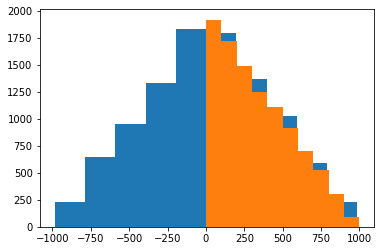

In [46]:
plt.hist((Y[:,0]-Y[:,1]), bins=10)
plt.hist(np.abs(np.random.randint(0, 1000,size=(10000))- np.random.randint(0, 1000, size=(10000))))

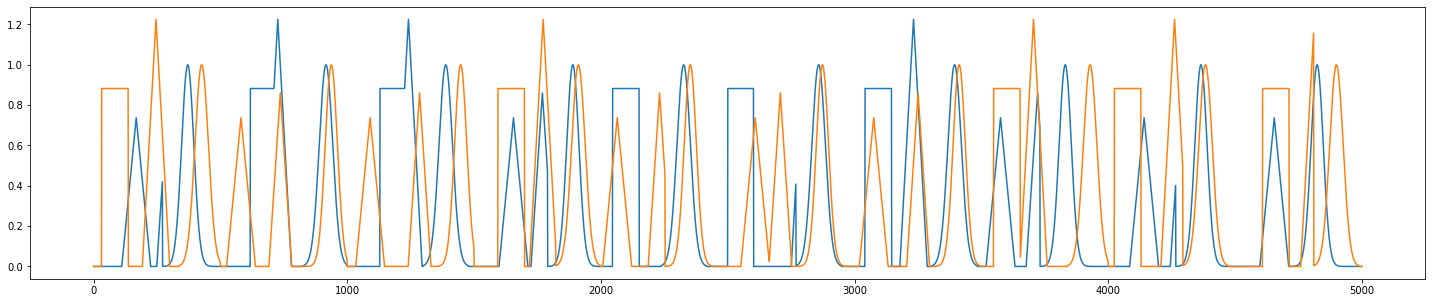

In [5]:
from data.gen_periodic_data import PeriodicGenerator
PG = PeriodicGenerator(1, 2, 5000, 2, 500)
signal, peaks = PG.generate()
x = np.arange(5000)
plt.figure(figsize=(25,5))
plt.plot(x, signal[0, 0])
plt.plot(x, signal[0, 1])
plt.show()

[[  81.  520. 1050. 1534. 2060. 2590. 3129. 3600. 4068. 4604.]
 [ 147.  686. 1156. 1622. 2146. 2649. 3187. 3648. 4185. 4654.]]


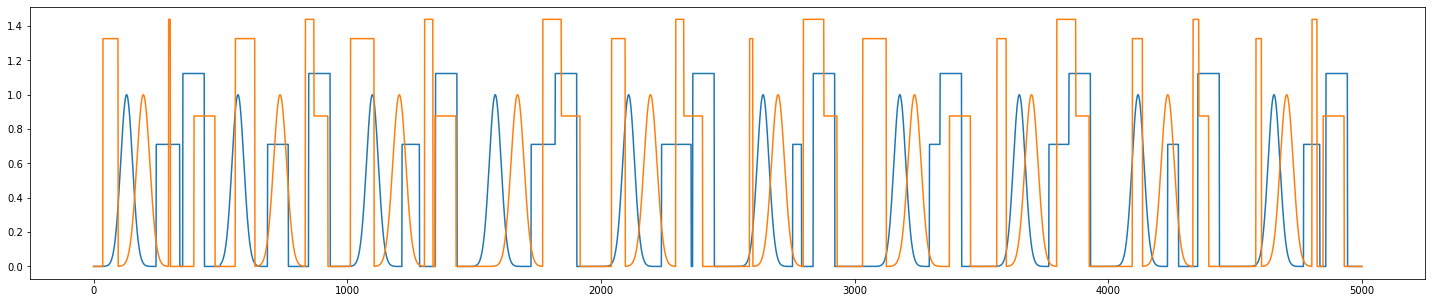

In [20]:
PG2 = PeriodicGenerator(10000, 2, 5000, [2,3], 500)
signals, peaks = PG2.generate_fast(shift=False)
np.savez("../data/periodic_100.npz", signals=signals, peaks=peaks)
data =np.load("../data/periodic_100.npz")
signals = data["signals"]
peaks = data["peaks"]
x = np.arange(5000)
plt.figure(figsize=(25, 5))
plt.plot(x, signals[0, 0])
plt.plot(x, signals[0, 1])
print(peaks[0])

[autoreload of data.gen_periodic_data failed: Traceback (most recent call last):
  File "/mnt/nas/homes/Wr1t3R/.local/share/virtualenvs/distance_layer-ZngIPy5f/lib/python3.6/site-packages/IPython/extensions/autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "/mnt/nas/homes/Wr1t3R/.local/share/virtualenvs/distance_layer-ZngIPy5f/lib/python3.6/site-packages/IPython/extensions/autoreload.py", line 394, in superreload
    module = reload(module)
  File "/usr/lib/python3.6/imp.py", line 315, in reload
    return importlib.reload(module)
  File "/usr/lib/python3.6/importlib/__init__.py", line 166, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 618, in _exec
  File "<frozen importlib._bootstrap_external>", line 678, in exec_module
  File "<frozen importlib._bootstrap>", line 219, in _call_with_frames_removed
  File "../data/gen_periodic_data.py", line 5, in <module>
    from gen_data import DataGenerator
ModuleNotF

(array([ 12.,  24.,  47., 102., 140., 220., 241., 311., 290., 313., 329.,
        252., 272., 269., 211., 210., 216., 187., 168., 167., 156., 143.,
        143., 122., 115., 100.,  77.,  61.,  41.,  40.,  30.,  25.,  24.,
         34.,  40.,  64.,  76., 101.,  96.,  90., 147., 117., 162., 148.,
        163., 144., 139., 155., 162., 132., 122., 162., 158., 128., 136.,
        121., 118.,  87.,  80.,  64.,  44.,  26.,  19.,  12.,   8.,   4.,
          1.,   2.,   0.,   1.,   2.,   3.,   4.,   8.,  20.,  16.,  26.,
         58.,  64.,  72.,  91., 103., 127., 142., 129., 140., 147., 105.,
        121.,  84.,  73.,  41.,  35.,  29.,  16.,   7.,   7.,   4.,   1.,
          4.]),
 array([ 16.7 ,  19.84,  22.98,  26.12,  29.26,  32.4 ,  35.54,  38.68,
         41.82,  44.96,  48.1 ,  51.24,  54.38,  57.52,  60.66,  63.8 ,
         66.94,  70.08,  73.22,  76.36,  79.5 ,  82.64,  85.78,  88.92,
         92.06,  95.2 ,  98.34, 101.48, 104.62, 107.76, 110.9 , 114.04,
        117.18, 120.32, 123.46

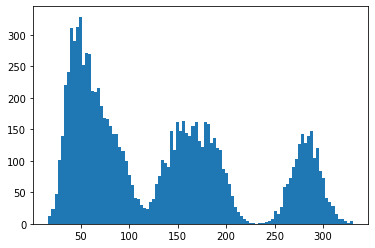

In [21]:
plt.hist((peaks[:, 1, :] - peaks[:, 0, :]).mean(axis=-1), bins=100)

In [14]:
a = np.random.randint(10, size=(3, 2, 10))
b = np.random.randint(10, size=(3, 2))
print(np.argsort(b, axis=1))
print(a)
print("--------")
print(np.argsort(b, axis=1)[1])
indices = np.indices((3, 2))
print(a[indices[0], np.argsort(b, axis=1), :])
print(a[np.arange(3), np.argsort(b, axis=1)[1], ...].shape)

[[0 1]
 [1 0]
 [1 0]]
[[[8 6 0 8 2 8 7 8 8 1]
  [7 6 1 8 7 5 3 1 6 4]]

 [[0 2 8 7 0 4 4 2 8 0]
  [0 0 7 9 3 3 0 0 2 0]]

 [[6 8 5 1 3 0 8 2 4 2]
  [3 0 2 9 4 3 3 1 0 6]]]
--------
[1 0]
[[[8 6 0 8 2 8 7 8 8 1]
  [7 6 1 8 7 5 3 1 6 4]]

 [[0 0 7 9 3 3 0 0 2 0]
  [0 2 8 7 0 4 4 2 8 0]]

 [[3 0 2 9 4 3 3 1 0 6]
  [6 8 5 1 3 0 8 2 4 2]]]


IndexError: shape mismatch: indexing arrays could not be broadcast together with shapes (3,) (2,) 

In [5]:
data = np.load("../data/periodic_100000.npz")
signals, peaks = data["signals"], data["peaks"]
(peaks[:, 1, :] - peaks[:, 0, :]).mean(axis=-1)

array([129. , 134.1, 147.7, ..., 265. , 260.4,  53.8])

65.45499041468001


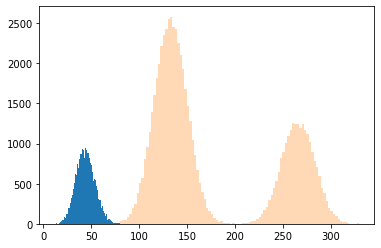

In [7]:
x = (peaks[:, 1, :] - peaks[:, 0, :]).mean(axis=-1)
x[x<80]
plt.hist(x[x<80],bins=100)
plt.hist(x[x>=80], bins=100, alpha=0.3)
print(np.abs(x-x.mean()).mean())

(array([1.710000e+02, 0.000000e+00, 1.704000e+03, 0.000000e+00,
        0.000000e+00, 9.258000e+03, 0.000000e+00, 3.560600e+04,
        0.000000e+00, 0.000000e+00, 1.047440e+05, 0.000000e+00,
        2.467920e+05, 0.000000e+00, 0.000000e+00, 4.832770e+05,
        0.000000e+00, 8.025350e+05, 0.000000e+00, 0.000000e+00,
        1.146813e+06, 0.000000e+00, 1.415771e+06, 0.000000e+00,
        0.000000e+00, 1.515498e+06, 0.000000e+00, 1.412858e+06,
        0.000000e+00, 0.000000e+00, 1.145107e+06, 0.000000e+00,
        8.008440e+05, 0.000000e+00, 4.827140e+05, 0.000000e+00,
        0.000000e+00, 2.454310e+05, 0.000000e+00, 0.000000e+00,
        1.043110e+05, 0.000000e+00, 3.551800e+04, 0.000000e+00,
        0.000000e+00, 9.167000e+03, 0.000000e+00, 1.709000e+03,
        0.000000e+00, 1.720000e+02]),
 array([0.  , 0.04, 0.08, 0.12, 0.16, 0.2 , 0.24, 0.28, 0.32, 0.36, 0.4 ,
        0.44, 0.48, 0.52, 0.56, 0.6 , 0.64, 0.68, 0.72, 0.76, 0.8 , 0.84,
        0.88, 0.92, 0.96, 1.  , 1.04, 1.08, 1.

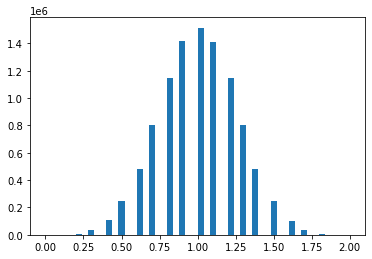

In [61]:
data = np.random.randint(0,3,size=(10000000, 10), ).mean(axis=-1)
